# **Assignment: Flowers Recognition**
## **Dataset Description:**

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

## **WORKFLOW :**
Load Data
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction

## **Data :**
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
import pathlib as pl
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
from keras import models
from keras import layers
import glob
import os
import cv2

## **Load Data**

In [ ]:
#filelist = glob.glob("/content/drive/MyDrive/AI/DLAssignment/Flowers_Recognition/flowers/*.*", recursive=True)
root = '/content/drive/MyDrive/AI/DLAssignment/Flowers_Recognition/flowers/'
#data = np.array([np.array(Image.open(fname)) for fname in filelist])
#print(filelist)
#ImagesList = []

flowers = []
features = []
labels = []
ImageSize = (50, 50)

# for path, subdirs, files in os.walk(root):
#     flowers.append(path)
#     print(path)
#     for name in files:
#         #print(os.path.join(path, name))
#         if name.endswith("jpg"):
#           labels.append(path)
#           imageFile = cv2.imread(str(os.path.join(path, name)), cv2.IMREAD_GRAYSCALE)
#           imageResized = cv2.resize(imageFile, (150,150))
#           ImagesList.append(imageResized)
#           # ImagesList.append(imageFile)

#           # img = cv2.imread(os.path.join(data,folder,file))
#           #     im = cv2.resize(img,size)
#           #     data_images.append(im)

#path = pl.Path(root)

# Iterating Over Directory To Extract Sub Directories
for dir in pl.Path(root).iterdir():
  flowers.append(dir.name)
  #print('Root: ', dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      #print('Sub folder: ', dir.name)
      labels.append(dir.name)
      imgfile = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgfile, ImageSize)
      features.append(imgarr)


#data = np.array([np.array(cv2.imread(os.path.join(path, name),0), dtype=object) for path, subdirs, files in os.walk(root) for name in files])
#dataframe = pd.read_csv(filename)
#[os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files]

In [ ]:
print(len(features), len(flowers), len(labels))

4323 5 4323


In [ ]:
for flower in flowers:
  print(flower)

dandelion
rose
daisy
sunflower
tulip


In [ ]:
print(labels[0], labels[2000], labels[3501], labels[4300])

dandelion daisy tulip tulip


In [ ]:
# from keras.utils import to_categorical
# labels_cat = to_categorical(labels)
# print(labels_cat)
label_dummies = pd.get_dummies(labels)
labels =  label_dummies.values.argmax(1)
print(label_dummies)
print(labels)

      daisy  dandelion  rose  sunflower  tulip
0         0          1     0          0      0
1         0          1     0          0      0
2         0          1     0          0      0
3         0          1     0          0      0
4         0          1     0          0      0
...     ...        ...   ...        ...    ...
4318      0          0     0          0      1
4319      0          0     0          0      1
4320      0          0     0          0      1
4321      0          0     0          0      1
4322      0          0     0          0      1

[4323 rows x 5 columns]
[1 1 1 ... 4 4 4]


In [ ]:
print(np.unique(labels))

[0 1 2 3 4]


## **Encode labels**

In [ ]:
#labels = np.asarray(labels).astype("float32")
#data = features.reshape((4323, 50 * 50))
data = np.asarray(features).astype("float32")/255

In [ ]:
data

In [ ]:
data.shape

(4323, 50, 50)

In [ ]:
data = data.reshape((data.shape[0], 50 * 50))

In [ ]:
data.shape

(4323, 2500)

In [ ]:
labels.shape

(4323,)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels=train_test_split(data, labels, test_size=0.4, random_state=1)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.0, random_state=42)

In [ ]:
# labels = labels.reshape((4323,))
# labels = np.asarray(labels).astype("float32")
train_data=train_data.astype("float32")/255
test_data = test_data.astype("float32")/255

In [ ]:
# from keras.utils import to_categorical
# labels = to_categorical(labels)
# train_labels = train_labels.astype("float32")/255
# test_labels = test_labels.astype("float32")/255

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_data.shape

(2593, 2500)

In [ ]:
test_data.shape

(1730, 2500)

In [ ]:
train_labels.shape

(2593, 5)

In [ ]:
test_labels.shape

(1730, 5)

In [ ]:
data

## **Split**

In [ ]:
#Split into 60 and 40 ratio.
# train_images, test_images, val_images = np.split(data, [int(.6*len(data)), int(.8*len(data))])
# train_labels, test_labels, val_labels = np.split(labels, [int(.6*len(labels)), int(.8*len(labels))])

In [ ]:
#train_labels_cat, test_labels_cat, val_labels_cat = np.split(labels_cat, [int(.6*len(labels_cat)), int(.8*len(labels_cat))])

## **Create Model**

In [ ]:
# network = models.Sequential()
# network.add(layers.Dense(10, activation='relu', input_shape=(150, 150,1, )))
# #network.add(layers.Dense(8, activation='relu'))
# network.add(layers.Dense(5, activation='softmax'))

model=models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(2500,)))
# model.add(layers.Dense(64, activation = "relu" ))
# model.add(layers.Dense(32, activation = "relu" ))
model.add(layers.Dense(5, activation="softmax"))
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

## **Compilation Step**

In [ ]:
network.summary()

In [ ]:
# network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## **Train the Model**

In [ ]:
val_data = train_data[2000:]
val_labels = train_labels[2000:]

In [ ]:
history = model.fit(train_data, train_labels, validation_data = (val_data, val_labels), epochs= 100, batch_size=512, verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 57ms/step - loss: 1.6069 - accuracy: 0.2108 - val_loss: 1.5995 - val_accuracy: 0.2884
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 1.6008 - accuracy: 0.2736 - val_loss: 1.5939 - val_accuracy: 0.2867
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 1.5947 - accuracy: 0.2830 - val_loss: 1.5920 - val_accuracy: 0.3272
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 1.5930 - accuracy: 0.3114 - val_loss: 1.5885 - val_accuracy: 0.2698
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 1.5919 - accuracy: 0.2689 - val_loss: 1.5876 - val_accuracy: 0.3255
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 1.5901 - accuracy: 0.2988 - val_loss: 1.5860 - val_accuracy: 0.2917
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 1.5880 - accuracy: 0.3069 - val_loss: 1.5821 - val_accuracy: 0.3288
Epoch 8/100
6/6 [===

In [ ]:
# tf.reshape(train_images, (150, 150))

# # Set input shape
# sample_shape = train_images[0].shape
# img_width, img_height = sample_shape[0], sample_shape[1]
# input_shape = (img_width, img_height, 1)
# print(input_shape)

# sample_shape = train_images[0].shape
# img_width, img_height = sample_shape[0], sample_shape[1]
# input_shape = (img_width, img_height, 1)

# # Reshape data 
# train_images_1 = train_images.reshape(len(train_images), input_shape[0], input_shape[1], input_shape[2])
# #train_labels_1  = train_labels.reshape(len(train_labels), input_shape[0], input_shape[1], input_shape[2])


(150, 150, 1)


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print(history.history['accuracy'])
print(history.history['loss'])
print(history.history['val_accuracy'])
print(history.history['val_loss'])

[0.22097955644130707, 0.27188584208488464, 0.2822985053062439, 0.30389511585235596, 0.280755877494812, 0.29965290427207947, 0.3062090277671814, 0.31083688139915466, 0.2741997539997101, 0.30967989563941956, 0.30852293968200684, 0.30312380194664, 0.3062090277671814, 0.30428075790405273, 0.3065946698188782, 0.29001155495643616, 0.29541072249412537, 0.28461241722106934, 0.30582335591316223, 0.30543771386146545, 0.3062090277671814, 0.30582335591316223, 0.3100655674934387, 0.30428075790405273, 0.30312380194664, 0.3073659837245941, 0.31237947940826416, 0.3143077492713928, 0.3073659837245941, 0.3092942535877228, 0.3073659837245941, 0.31122252345085144, 0.31083688139915466, 0.3077516257762909, 0.3135364353656769, 0.3100655674934387, 0.3127651512622833, 0.3100655674934387, 0.31507906317710876, 0.3119938373565674, 0.3170073330402374, 0.3131507933139801, 0.3170073330402374, 0.31970691680908203, 0.3146933913230896, 0.3204782009124756, 0.3231777846813202, 0.3216351568698883, 0.3231777846813202, 0.32

In [ ]:
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['loss']))
print(np.mean(history.history['val_accuracy']))
print(np.mean(history.history['val_loss']))

0.3219668333232403
1.5202089750766754
0.33993254482746127
1.5185307037830353


In [ ]:
loss_values = history.history['loss']
print(loss_values)
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

[1.6057847738265991, 1.5994027853012085, 1.5955939292907715, 1.5936567783355713, 1.5915288925170898, 1.589829683303833, 1.587221622467041, 1.5848420858383179, 1.5832576751708984, 1.5803028345108032, 1.5783716440200806, 1.5759094953536987, 1.5732697248458862, 1.5705677270889282, 1.5681051015853882, 1.5660765171051025, 1.5631599426269531, 1.561834692955017, 1.5593374967575073, 1.557008147239685, 1.5546387434005737, 1.5524004697799683, 1.5509674549102783, 1.5477482080459595, 1.5456730127334595, 1.5436785221099854, 1.5422853231430054, 1.5397186279296875, 1.5372883081436157, 1.5356523990631104, 1.5339276790618896, 1.5317705869674683, 1.5301234722137451, 1.5288424491882324, 1.5273946523666382, 1.525156855583191, 1.5236414670944214, 1.521599531173706, 1.5201326608657837, 1.518373966217041, 1.517201542854309, 1.5151945352554321, 1.5141706466674805, 1.5134100914001465, 1.511910080909729, 1.5105855464935303, 1.509576678276062, 1.508657693862915, 1.5076590776443481, 1.5069888830184937, 1.50701630

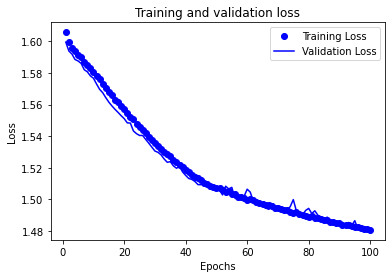

In [ ]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc_values = history.history['accuracy']
print(acc_values)
val_acc_values = history.history['val_accuracy']
print(val_acc_values)

[0.22097955644130707, 0.27188584208488464, 0.2822985053062439, 0.30389511585235596, 0.280755877494812, 0.29965290427207947, 0.3062090277671814, 0.31083688139915466, 0.2741997539997101, 0.30967989563941956, 0.30852293968200684, 0.30312380194664, 0.3062090277671814, 0.30428075790405273, 0.3065946698188782, 0.29001155495643616, 0.29541072249412537, 0.28461241722106934, 0.30582335591316223, 0.30543771386146545, 0.3062090277671814, 0.30582335591316223, 0.3100655674934387, 0.30428075790405273, 0.30312380194664, 0.3073659837245941, 0.31237947940826416, 0.3143077492713928, 0.3073659837245941, 0.3092942535877228, 0.3073659837245941, 0.31122252345085144, 0.31083688139915466, 0.3077516257762909, 0.3135364353656769, 0.3100655674934387, 0.3127651512622833, 0.3100655674934387, 0.31507906317710876, 0.3119938373565674, 0.3170073330402374, 0.3131507933139801, 0.3170073330402374, 0.31970691680908203, 0.3146933913230896, 0.3204782009124756, 0.3231777846813202, 0.3216351568698883, 0.3231777846813202, 0.32

<Figure size 432x288 with 0 Axes>

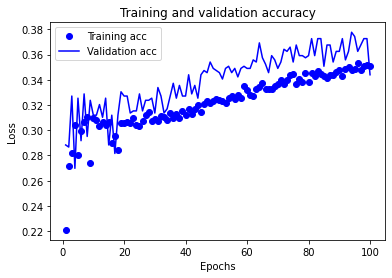

In [ ]:
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Tune Model**

In [ ]:
model=models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(2500,)))
# model.add(layers.Dense(64, activation = "relu" ))
# model.add(layers.Dense(32, activation = "relu" ))
model.add(layers.Dense(5, activation="softmax"))
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

## **Evaluate**

In [ ]:
model.fit(train_data, train_labels, epochs= 20, batch_size=512, verbose=1)
results = model.evaluate(val_data, val_labels)

Epoch 1/20
6/6 [==============================] - 1s 14ms/step - loss: 1.6066 - accuracy: 0.2122
Epoch 2/20
6/6 [==============================] - 0s 12ms/step - loss: 1.5975 - accuracy: 0.2982
Epoch 3/20
6/6 [==============================] - 0s 14ms/step - loss: 1.5955 - accuracy: 0.2720
Epoch 4/20
6/6 [==============================] - 0s 12ms/step - loss: 1.5906 - accuracy: 0.2998
Epoch 5/20
6/6 [==============================] - 0s 12ms/step - loss: 1.5890 - accuracy: 0.3109
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 1.5869 - accuracy: 0.3045
Epoch 7/20
6/6 [==============================] - 0s 10ms/step - loss: 1.5862 - accuracy: 0.2855
Epoch 8/20
6/6 [==============================] - 0s 11ms/step - loss: 1.5818 - accuracy: 0.2925
Epoch 9/20
6/6 [==============================] - 0s 10ms/step - loss: 1.5817 - accuracy: 0.2793
Epoch 10/20
6/6 [==============================] - 0s 11ms/step - loss: 1.5783 - accuracy: 0.2793
Epoch 11/20
6/6 [============

In [ ]:
results

[1.5474656820297241, 0.32546374201774597]

## **Predict**

In [ ]:
model.predict(test_data)

array([[0.10152198, 0.1662219 , 0.15771732, 0.25329837, 0.32124043],
       [0.14850257, 0.20747419, 0.17440471, 0.20852038, 0.26109815],
       [0.21739352, 0.26247412, 0.17615698, 0.15278414, 0.19119124],
       ...,
       [0.20835546, 0.25071162, 0.1798814 , 0.15962674, 0.20142472],
       [0.23947296, 0.2930335 , 0.16182387, 0.13374777, 0.17192188],
       [0.22850677, 0.26171097, 0.17879225, 0.14812557, 0.18286438]],
      dtype=float32)